# Superstore Sales  Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.


###  Analyse the given  data and provide management with the insight they need as listed below.

1. The most performing market in terms of sales and profit.(show visualizations of sales per market and profit per market)
2. What product category(not sub-category) sells best and what product categogry(not sub-category) sells low in each Market?
3. The trend of sales for each year
4. The trend of profit for each year
5. The general trend of sales from 2011 - 2014.
6. Which month does the company sells best considering the whole data?
7. The relationship between discount and sales?
8. Any other insight













### Importing the necessary packages

In [136]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


# **Reading Data**

In [8]:
#Reading the data
data = pd.read_csv("superstore_data.csv", parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')


In [10]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
data.shape

(51290, 24)

### Checking for missing data

In [9]:
data.isna().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

In [10]:
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

### Dropping postal Code



In [11]:
data.drop("Postal Code",axis = 1,inplace = True)

In [12]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


### Creating new columns





In [14]:
#Getting the Order Date year
data['Order_Year']=(pd.to_datetime(data["Order Date"])).dt.year

#Getting the Order month in string(abrv)
data["Order_Month"]=(pd.to_datetime(data["Order Date"])).dt.month_name().str[:3]

#Getting the Shipping date year
data['Ship_Year']=(pd.to_datetime(data["Ship Date"])).dt.year

#Getting the Shipping date year
data["Ship_Month"]=(pd.to_datetime(data["Ship Date"])).dt.month_name().str[:3]#\

#Adding Shipping_interval into days
data["Shipping_interval"]= pd.to_datetime(data["Ship Date"])- pd.to_datetime(data["Order Date"])

#Converting shipping_interval (data type) into Days(integer)
data["Shipping_interval"] = (data["Shipping_interval"]/ np.timedelta64(1,'D')).astype(int) 

#Adding unit price 
data["Unit price"] = data["Sales"]/data["Quantity"]

In [15]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Ship_Year,Ship_Month,Shipping_interval,Unit price
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,Jan,2011,Jun,151,204.150
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,Jan,2011,Aug,212,40.122
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,Jan,2011,May,120,16.530


In [13]:
#checking unique values for each column
for x in range(len(data.columns)):
    print(f"Values for \"{data.columns[x]}\"")
    print(data[data.columns[x]].value_counts())
    
    print("\n")

Values for "Row ID"
42433    1
9465     1
2645     1
24695    1
32089    1
        ..
40262    1
16653    1
2963     1
16652    1
36388    1
Name: Row ID, Length: 51290, dtype: int64


Values for "Order ID"
CA-2014-100111     14
NI-2014-8880       13
TO-2014-9950       13
IN-2012-41261      13
IN-2013-42311      13
                   ..
ID-2014-43494       1
ES-2014-2638373     1
IT-2014-1612191     1
PL-2014-9180        1
CA-2014-156720      1
Name: Order ID, Length: 25035, dtype: int64


Values for "Order Date"
2014-06-18    135
2014-11-18    127
2014-03-09    126
2014-11-20    118
2014-12-29    116
             ... 
2013-07-07      1
2011-01-16      1
2012-09-23      1
2013-07-21      1
2013-10-11      1
Name: Order Date, Length: 1430, dtype: int64


Values for "Ship Date"
2014-11-22    130
2014-07-09    115
2014-11-17    101
2014-07-12    101
2014-11-29    100
             ... 
2013-03-21      3
2011-04-14      3
2011-03-01      2
2011-05-01      2
2011-06-01      2
Name: Ship Date

In [16]:
# classifying data into numerical and categorical type

#selecting colums that have numerical variables
num_data_var = data.select_dtypes(exclude='object')
print("The number of numerical variables: ", len(num_data_var.columns))

#creating new dataframe and droping row id
new_num_data = num_data_var.drop("Row ID",axis = 1)

The number of numerical variables:  12


In [17]:
#checking descritive statistics for numerical variable
new_num_data.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year,Ship_Year,Shipping_interval,Unit price
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,2012.792728,5.079041,71.657487
std,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,1.105303,97.771493,113.581515
min,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,2011.000000,-322.000000,0.336000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,2012.000000,1.000000,11.799900
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,2013.000000,4.000000,29.400000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,2014.000000,59.000000,82.160000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,2015.000000,214.000000,3773.080000


array([[<AxesSubplot:title={'center':'Order Date'}>,
        <AxesSubplot:title={'center':'Ship Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'Shipping Cost'}>,
        <AxesSubplot:title={'center':'Order_Year'}>,
        <AxesSubplot:title={'center':'Ship_Year'}>],
       [<AxesSubplot:title={'center':'Shipping_interval'}>,
        <AxesSubplot:title={'center':'Unit price'}>, <AxesSubplot:>]],
      dtype=object)

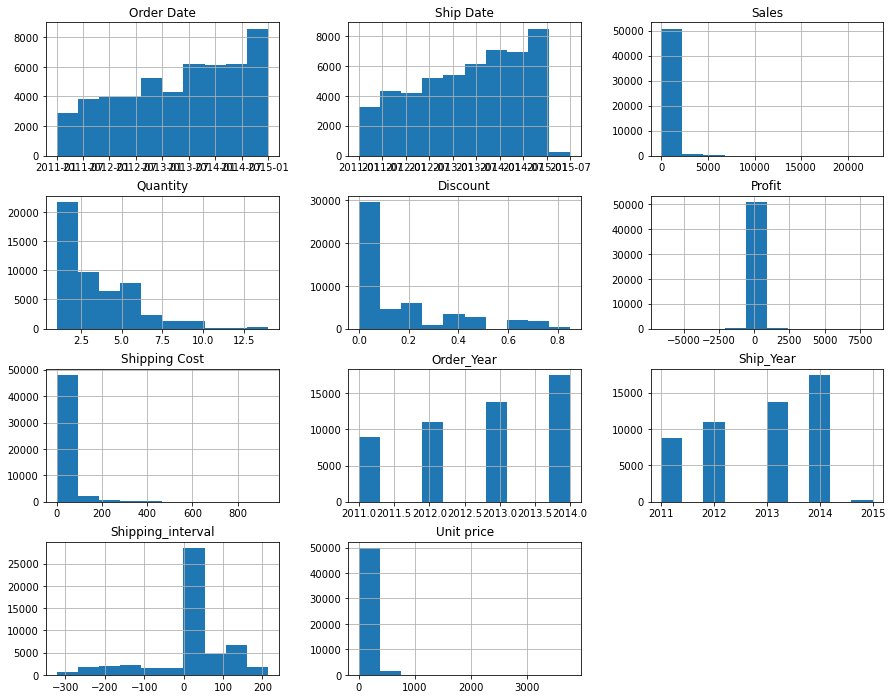

In [18]:
# Check the distribution for numerical variable
new_num_data.hist(figsize=(15,12))

In [20]:
## Getting the categorical variables(dummy_variables)
categorical_data = data.select_dtypes(exclude="number")
print("The number of categorical variables: ", len(categorical_data.columns))

The number of categorical variables:  19


### What is the sales and profit per market?

In [22]:
#Using groupby to group market by Sales and Profit
sp_market = pd.DataFrame(data.groupby(["Market"])["Sales","Profit"].sum())
sp_market  

,Sales,Profit
Market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


In [21]:
#converting sales from exponential to real life number for table
sp_market_edit= sp_market.copy()
sp_market_edit["Sales"] = sp_market["Sales"].apply(lambda x: "{:f}".format(float(x)))
print(type(sp_market_edit["Sales"][0]))
sp_market_edit

<class 'str'>


,Sales,Profit
Market,,
APAC,3585744.129000,436000.04900
Africa,783773.211000,88871.63100
Canada,66928.170000,17817.39000
EMEA,806161.311000,43897.97100
EU,2938089.061500,372829.74150
LATAM,2164605.167080,221643.48708
US,2297200.860300,286397.02170


Text(0.5, 1.0, 'Sales and Profit per Market')

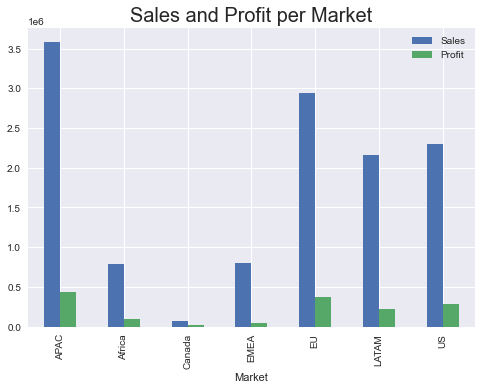

In [139]:

sp_market.plot(kind="bar")
plt.title("Sales and Profit per Market",fontsize = 20)

The company makes the most sales & profit from the APAC Market, while they make the least sales & profit from the Canada Market

### 2. which products are making loss?


<AxesSubplot:title={'center':'Products that are performing badly'}, xlabel='Product Name'>

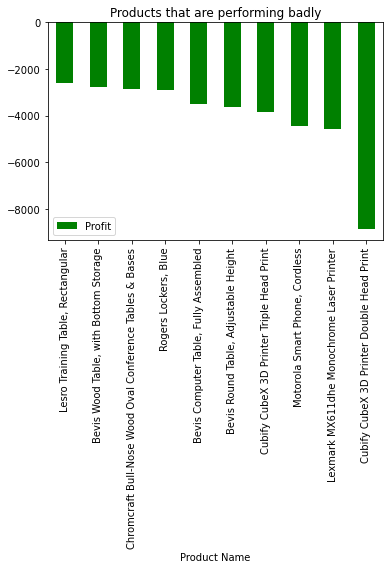

In [56]:
loss_product = pd.DataFrame(data.groupby(["Product Name"])["Profit","Quantity","Sales","Unit price","Shipping Cost","Discount"].sum().nsmallest(10,"Profit")).reset_index()
loss_product.sort_values(by = "Profit",ascending = False,inplace = True)
loss_product.plot(kind="bar",x="Product Name",y="Profit",color= "green",title="Products that are performing badly")

### 3. Products that are least bought

In [89]:
## grouping product by their "Quantity","Unit price","Shipping Cost","Discount" and checking their correlation
product_least = pd.DataFrame(data.groupby("Product Name")["Quantity","Profit","Sales","Unit price","Shipping Cost","Discount"].sum()).nsmallest(10,"Quantity").reset_index()
product_least["Demand_level"] = "low"
product_least

,Product Name,Quantity,Profit,Sales,Unit price,Shipping Cost,Discount,Demand_level
0,Boston 1900 Electric Pencil Sharpener,1,4.4940,14.980,14.980,2.08,0.00,low
1,"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,-12.6882,119.833,119.833,13.47,0.15,low
2,"Chromcraft Training Table, Adjustable Height",1,-87.7360,38.144,38.144,1.53,0.80,low
3,Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,25.8980,207.184,207.184,26.94,0.20,low
4,Penpower WorldCard Pro Card Scanner,1,-1.8295,91.475,91.475,10.93,0.50,low
5,Xerox 20,1,3.1104,6.480,6.480,0.61,0.00,low
6,Avery 5,2,2.8224,5.760,2.880,1.10,0.00,low
7,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.1570,7.700,3.850,0.61,0.00,low
8,"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,15.3522,136.464,68.232,29.02,0.20,low
9,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,2,1995.9900,3991.980,1995.990,276.89,0.00,low


From the analysis of the least bought products and non performing products, it can be dedeuced that a product that is not demanded alot from the customers does not necesseraly means is a non-performing product 

### The most sought after products

In [88]:
# Creating a new dataframe consisting of top 1o performing product
Top_products = pd.DataFrame(data.groupby("Product Name")["Quantity","Profit","Sales","Unit price","Shipping Cost","Discount"].sum()).nlargest(10,columns = "Quantity").reset_index()
Top_products["Demand_level"] = "high"
Top_products

,Product Name,Quantity,Profit,Sales,Unit price,Shipping Cost,Discount,Demand_level
0,Staples,876,2611.0694,7008.2000,2011.7060,731.43,21.20,high
1,"Cardinal Index Tab, Clear",337,556.3702,1922.8302,529.6778,208.35,10.32,high
2,"Eldon File Cart, Single Width",321,4238.8887,34387.7287,9892.2816,3970.85,8.82,high
3,"Rogers File Cart, Single Width",262,2394.8953,29466.3053,8861.2742,3136.28,16.26,high
4,"Sanford Pencil Sharpener, Water Color",259,601.9441,5581.9741,1800.7906,570.38,10.66,high
5,"Stockwell Paper Clips, Assorted Sizes",253,251.2878,2395.4378,609.7621,269.20,9.86,high
6,"Avery Index Tab, Clear",252,221.5388,1312.9488,369.2813,140.52,9.01,high
7,"Ibico Index Tab, Clear",251,125.6411,1807.1811,593.4357,193.26,10.71,high
8,"Smead File Cart, Single Width",250,-237.6692,25397.1708,7650.5247,3036.45,13.06,high
9,"Stanley Pencil Sharpener, Water Color",242,125.5390,5537.2290,1769.4618,520.21,5.57,high


In [138]:
#combining most soughted products and least demanded products
Top_least = pd.concat([product_least, Top_products], ignore_index=True, sort=False)
Top_least

,Product Name,Quantity,Profit,Sales,Unit price,Shipping Cost,Discount,Demand_level
0,Boston 1900 Electric Pencil Sharpener,1,4.4940,14.9800,14.9800,2.08,0.00,low
1,"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1,-12.6882,119.8330,119.8330,13.47,0.15,low
2,"Chromcraft Training Table, Adjustable Height",1,-87.7360,38.1440,38.1440,1.53,0.80,low
3,Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1,25.8980,207.1840,207.1840,26.94,0.20,low
4,Penpower WorldCard Pro Card Scanner,1,-1.8295,91.4750,91.4750,10.93,0.50,low
5,Xerox 20,1,3.1104,6.4800,6.4800,0.61,0.00,low
6,Avery 5,2,2.8224,5.7600,2.8800,1.10,0.00,low
7,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2,3.1570,7.7000,3.8500,0.61,0.00,low
8,"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",2,15.3522,136.4640,68.2320,29.02,0.20,low
9,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,2,1995.9900,3991.9800,1995.9900,276.89,0.00,low


### Corrrelation between data 

<AxesSubplot:title={'center':'Relationship between Data variables '}>

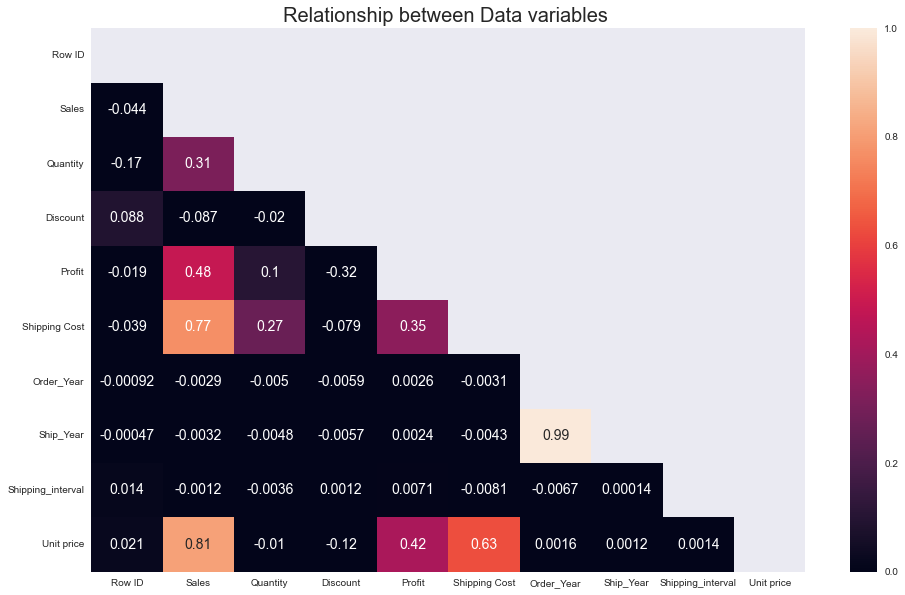

In [140]:
plt.figure(figsize = (16,10))
#creating mask for the heat map
mask = np.zeros_like(data.corr())
upper_part = np.triu_indices_from(mask)
mask[upper_part] = 1
plt.title("Relationship between Data variables ", fontsize=20)
plt.xlabel("variables",fontsize=20)
sns.heatmap(data.corr(),mask = mask, annot =True, annot_kws={"size":14},vmin = 0,vmax = 1)

### Which month does the company records more sales?

In [97]:
#grouping sales by month
monthly_sales = data.groupby("Order_Month")["Sales"].sum().reset_index()

#convert ordered month back from month abrv in string to date.time month
monthly_sales["Order_Month"] = pd.to_datetime(monthly_sales["Order_Month"], format='%b', errors='coerce').dt.month
monthly_sales = monthly_sales.sort_values(by="Order_Month")
monthly_sales

,Order_Month,Sales
4,1,7.757669e+05
3,2,7.228532e+05
7,3,9.513331e+05
0,4,8.516173e+05
8,5,9.764157e+05
6,6,1.152368e+06
5,7,8.387436e+05
1,8,1.247501e+06
11,9,1.244140e+06
10,10,1.120777e+06


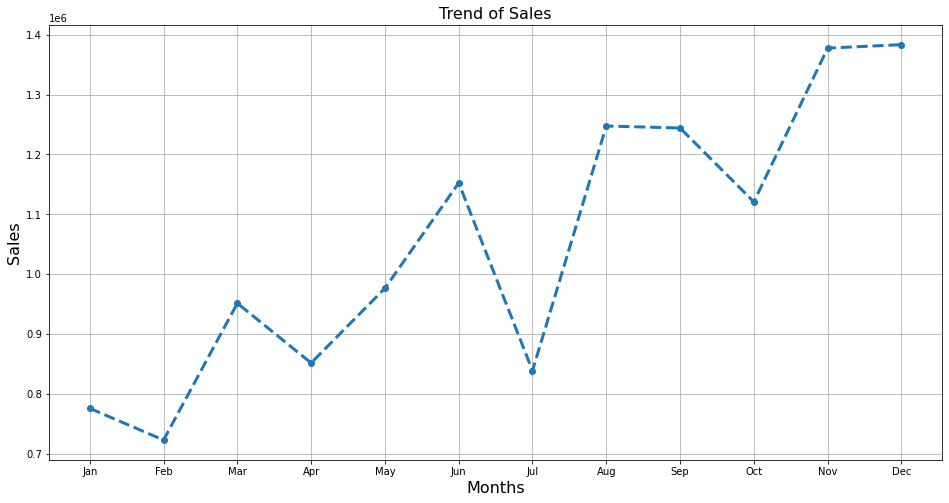

In [98]:

plt.figure(figsize=[16,8])
plt.grid()
plt.title("Trend of Sales", fontsize = 16)
plt.xlabel("Months",fontsize=16)
plt.ylabel("Sales",fontsize=16)
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = monthly_sales["Order_Month"]
y =monthly_sales["Sales"]
plt.xticks(x,labels=label)
plt.plot(x,y,lw=3,ls='--', marker='o')


### What is the dominant product category in each market?

In [100]:
cat_Market_Sales = data.groupby(["Category","Market"])["Sales"].sum()

Text(0.5, 0, 'Category')

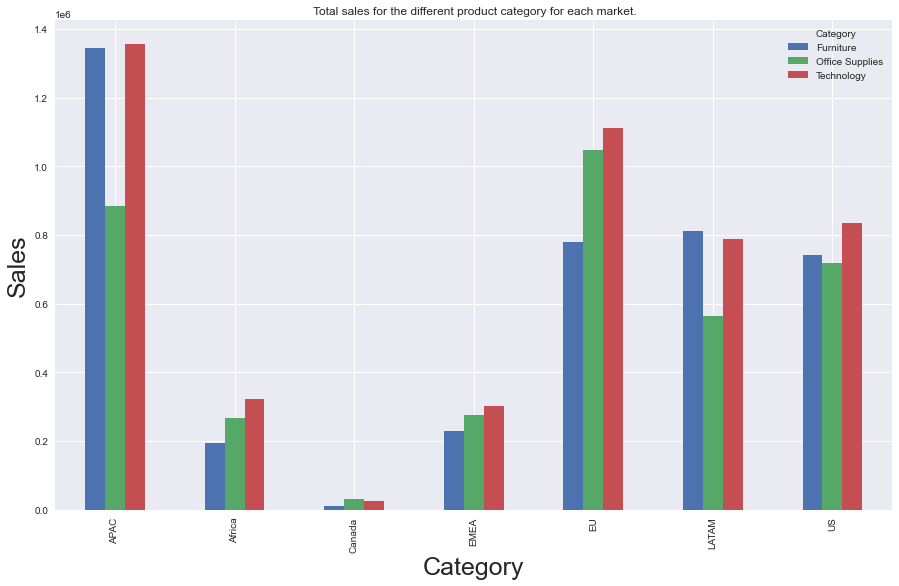

In [141]:
style.use("seaborn-deep")
ax = cat_Market_Sales.unstack(0).plot(kind="bar",figsize=(15,9))#ploting the group bar chart
ax.set(title=' Total sales for the different product category for each market.')
ax.set_ylabel("Sales", fontsize = 25)
ax.set_xlabel("Category", fontsize = 25)

### City with most orders for a given product category?

In [105]:
Order_city = pd.DataFrame(data.groupby(["Category","City"])["Quantity"].sum())
Order_city.reset_index(inplace=True)
Order_city

,Category,City,Quantity
0,Furniture,Aachen,10
1,Furniture,Aalen,3
2,Furniture,Aalst,4
3,Furniture,Aba,4
4,Furniture,Abadan,8
...,...,...,...
8074,Technology,Ziguinchor,1
8075,Technology,Zinder,4
8076,Technology,Zlatoust,5
8077,Technology,Zunyi,6


In [106]:
##generating top 10 cities for differnt categories
#furniture_category
Cat_furniture = Order_city.loc[Order_city["Category"]=="Furniture"]
Ten_furniture_City = Cat_furniture.nlargest(10,columns = "Quantity")
Ten_furniture_City

,Category,City,Quantity
1480,Furniture,New York City,720
1221,Furniture,Los Angeles,588
1616,Furniture,Philadelphia,449
1281,Furniture,Manila,441
1892,Furniture,Santo Domingo,417
1839,Furniture,San Francisco,399
1906,Furniture,Seattle,370
1358,Furniture,Mexico City,301
2061,Furniture,Tegucigalpa,301
898,Furniture,Houston,291


<AxesSubplot:title={'center':'Top cities with most order in Furniture Category'}, xlabel='City'>

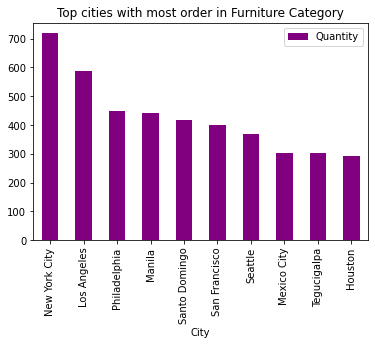

In [107]:
Ten_furniture_City.plot(kind="bar",x="City",y="Quantity",color= "purple",title="Top cities with most order in Furniture Category")

In [108]:
#generating top cities for supplies category
Cat_Office_Supplies = Order_city.loc[Order_city["Category"]=="Office Supplies"]
Cat_Office_Supplies.sort_values(by = "Quantity",ascending = False,inplace = True)
Ten_Office_Supplies_City = Cat_Office_Supplies.nlargest(10,columns = "Quantity")
Ten_Office_Supplies_City

,Category,City,Quantity
4441,Office Supplies,New York City,2065
4086,Office Supplies,Los Angeles,1688
4947,Office Supplies,San Francisco,1220
4634,Office Supplies,Philadelphia,1127
5034,Office Supplies,Seattle,928
3618,Office Supplies,Houston,924
5007,Office Supplies,Santo Domingo,897
4163,Office Supplies,Manila,813
5257,Office Supplies,Tegucigalpa,792
4157,Office Supplies,Managua,719


<AxesSubplot:title={'center':'Top cities with most order in Office supplies Category'}, xlabel='City'>

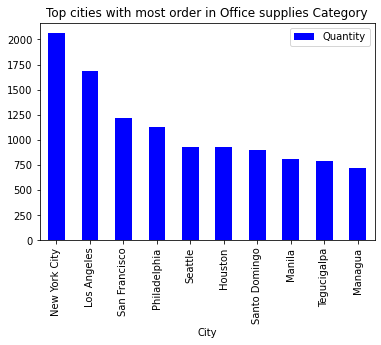

In [109]:
Ten_Office_Supplies_City.plot(kind="bar",x="City",y="Quantity",color= "blue",title="Top cities with most order in Office supplies Category")

In [110]:
Cat_Technology = Order_city.loc[Order_city["Category"]=="Technology"]
Cat_Technology.sort_values(by = "Quantity",ascending = False,inplace = True)
Ten_Technology_City = Cat_Technology.nlargest(10,columns = "Quantity")
Ten_Technology_City

,Category,City,Quantity
7204,Technology,New York City,632
6931,Technology,Los Angeles,603
6998,Technology,Manila,407
7337,Technology,Philadelphia,405
7612,Technology,Santo Domingo,335
7564,Technology,San Francisco,316
7631,Technology,Seattle,292
6992,Technology,Managua,252
6607,Technology,Houston,251
7733,Technology,Sydney,251


<AxesSubplot:title={'center':'Top cities with most order in Technology Category'}, xlabel='City'>

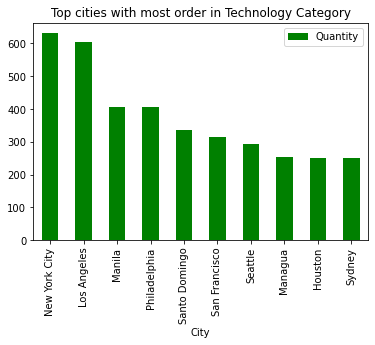

In [111]:
Ten_Technology_City.plot(kind="bar",x="City",y="Quantity",color= "green",title="Top cities with most order in Technology Category")

### Which segment provides more profit?

In [112]:
#group profit by segment
profit_segment = data.groupby(["Segment"])["Profit"].sum().reset_index()


[Text(0.5, 1.0, 'Segments per profits')]

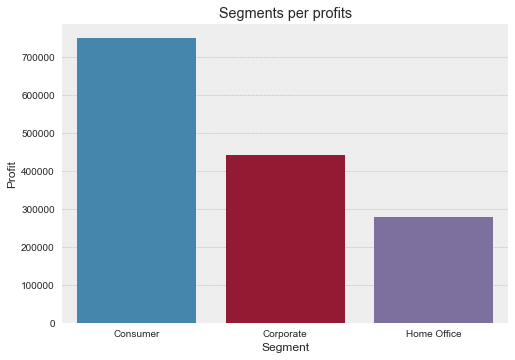

In [142]:
#profit_segment.plot(kind="bar",x="Segment",y="Profit")
style.use("bmh")
sns.barplot(x='Segment',y='Profit',data=profit_segment.nlargest(3,columns="Profit")).set(title = "Segments per profits")

## Which order priority yields more sales?


In [114]:
#group  sum of sales by order piority
Order_piority = data.groupby(["Order Priority"])["Sales"].sum().reset_index()
Order_piority.sort_values(inplace=True,by="Sales")

[Text(0.5, 1.0, 'order priority and sales')]

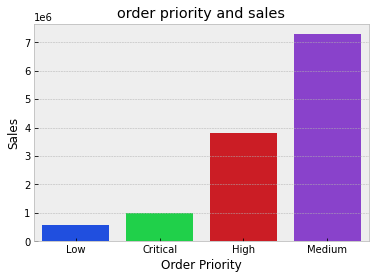

In [115]:
style.use("seaborn-bright")
sns.barplot(x='Order Priority',y='Sales',data=Order_piority).set(title = "order priority and sales")

### What is the average shipping cost to each region?

In [116]:
#group shipping cost by region and find the mean for each region
Average_shipping_cost  = data.groupby(["Region"])["Shipping Cost"].mean().reset_index()
Average_shipping_cost.sort_values(by="Shipping Cost",inplace=True)

Text(0, 0.5, 'Shipping Cost')

<Figure size 1008x720 with 0 Axes>

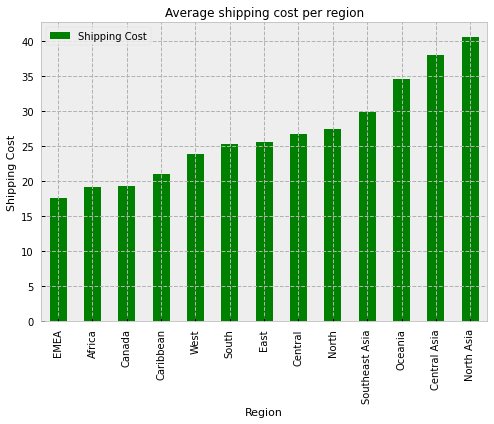

In [117]:
style.use("seaborn-notebook")
plt.figsize=(12,40)
plt.figure(figsize = (14,10))
Average_shipping_cost.plot(kind="bar",x="Region",y='Shipping Cost',color= "green")
plt.title('Average shipping cost per region')
plt.xlabel('Region')
plt.ylabel('Shipping Cost')


### Does the interval between the order date and the shipping date affect sale and profit

In [58]:
#sorting out wrong and right interval date
wrong_ship_data = pd.DataFrame(data.loc[data["Shipping_interval"] < 0])
wrong_ship_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Ship_Year,Ship_Month,Shipping_interval,Unit price
1512,25146,ID-2011-41632,2011-06-01,2011-01-13,Standard Class,RD-19660,Robert Dilbeck,Home Office,Ho Chi Minh City,Ho Chí Minh City,Vietnam,APAC,Southeast Asia,OFF-ST-10001631,Office Supplies,Storage,"Tenex Trays, Blue",89.9886,2,0.17,29.2686,3.62,Medium,2011,Jun,2011,Jan,-139,44.9943
1514,25145,ID-2011-41632,2011-06-01,2011-01-13,Standard Class,RD-19660,Robert Dilbeck,Home Office,Ho Chi Minh City,Ho Chí Minh City,Vietnam,APAC,Southeast Asia,OFF-PA-10003407,Office Supplies,Paper,"Enermax Memo Slips, Recycled",38.7693,3,0.17,11.5893,2.45,Medium,2011,Jun,2011,Jan,-139,12.9231
1517,33056,CA-2011-141817,2011-06-01,2011-01-13,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,United States,US,East,OFF-AR-10003478,Office Supplies,Art,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",19.5360,3,0.20,4.8840,1.85,Low,2011,Jun,2011,Jan,-139,6.5120
1794,28200,IN-2011-33351,2011-07-02,2011-02-13,Standard Class,DB-13660,Duane Benoit,Consumer,Zhenjiang,Jiangsu,China,APAC,North Asia,OFF-AP-10003491,Office Supplies,Appliances,"Hoover Coffee Grinder, Silver",278.1600,4,0.00,133.4400,20.16,Medium,2011,Jul,2011,Feb,-139,69.5400
1795,24076,IN-2011-40512,2011-07-02,2011-02-14,Standard Class,LT-17110,Liz Thompson,Consumer,Bekasi,Jawa Barat,Indonesia,APAC,Southeast Asia,TEC-PH-10002443,Technology,Phones,"Cisco Signal Booster, with Caller ID",252.0378,2,0.17,6.0378,11.19,Medium,2011,Jul,2011,Feb,-138,126.0189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51088,33005,CA-2014-123491,2014-10-31,2014-06-11,Standard Class,JK-15205,Jamie Kunitz,Consumer,San Francisco,California,United States,US,West,OFF-PA-10003424,Office Supplies,Paper,"""While you Were Out"" Message Book, One Form per Page",7.4200,2,0.00,3.7100,0.84,Medium,2014,Oct,2014,Jun,-142,3.7100
51089,33040,CA-2014-152807,2014-10-31,2014-04-11,Standard Class,MC-18100,Mick Crebagga,Consumer,Philadelphia,Pennsylvania,United States,US,East,OFF-ST-10002486,Office Supplies,Storage,Eldon Shelf Savers Cubes and Bins,11.1680,2,0.20,-2.5128,0.78,High,2014,Oct,2014,Apr,-203,5.5840
51090,32957,CA-2014-127285,2014-10-31,2014-07-11,Standard Class,MM-18055,Michelle Moray,Consumer,Seattle,Washington,United States,US,West,OFF-BI-10002072,Office Supplies,Binders,Cardinal Slant-D Ring Binders,13.9040,2,0.20,5.2140,0.67,Medium,2014,Oct,2014,Jul,-112,6.9520
51091,32790,CA-2014-139661,2014-10-31,2014-04-11,Standard Class,JW-15220,Jane Waco,Corporate,Vancouver,Washington,United States,US,West,FUR-FU-10002885,Furniture,Furnishings,Magna Visual Magnetic Picture Hangers,9.6400,2,0.00,3.6632,0.44,Medium,2014,Oct,2014,Apr,-203,4.8200


In [118]:
#using right interval date
right_ship_data = pd.DataFrame(data.loc[data["Shipping_interval"] > 0])
right_ship_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Ship_Year,Ship_Month,Shipping_interval,Unit price
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011,Jan,2011,Jun,151,204.150
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011,Jan,2011,Aug,212,40.122
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011,Jan,2011,May,120,16.530
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,2011,Jan,2011,May,120,14.955
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011,Jan,2011,Aug,212,22.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014,Dec,2015,Apr,91,6.952
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014,Dec,2015,May,121,3.990
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014,Dec,2015,Feb,32,8.800
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,2014,Dec,2015,Jun,152,7.120


-0.009136563842482045


,Shipping_interval,Sales,Profit,Shipping Cost
0,151,408.300,106.1400,35.46
1,212,120.366,36.0360,9.72
2,120,66.120,29.6400,8.17
3,120,44.865,-26.0550,4.82
4,212,113.670,37.7700,4.70
...,...,...,...,...
51285,91,13.904,4.5188,0.89
51286,121,3.990,0.4200,0.49
51287,32,26.400,12.3600,0.35
51288,152,7.120,0.5600,0.20


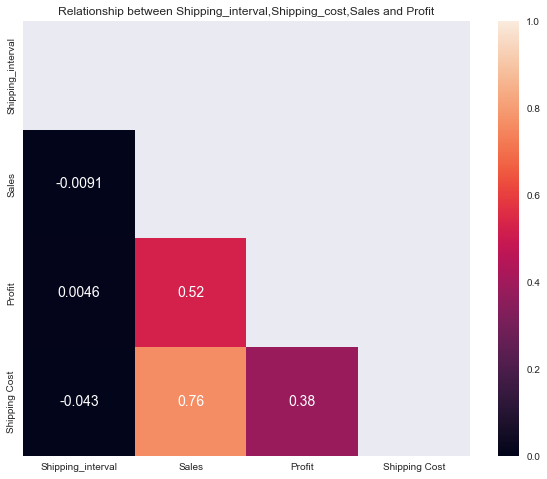

In [119]:

right_ship_data["Shipping_interval"].corr(right_ship_data["Sales"])
right_ship_data["Shipping_interval"].corr(right_ship_data["Profit"])
print(right_ship_data["Shipping_interval"].corr(right_ship_data["Sales"]))

#generating new data frame for "Shipping_interval","Sales","Profit","Shipping Cost"
new_data2 = right_ship_data[["Shipping_interval","Sales","Profit","Shipping Cost"]].copy()
style.use('seaborn')
fig = plt.figure(figsize = (10,8))
plt.title("Relationship between Shipping_interval,Shipping_cost,Sales and Profit")
mask = np.zeros_like(new_data2.corr())
upper_part = np.triu_indices_from(mask)
mask[upper_part] = 1

#generating heat map for the new-dataframe
sns.heatmap(new_data2.corr(),mask = mask, annot =True, annot_kws={"size":14}, vmin=0, vmax=1)
new_data2 

### The trend of sales for each year(show visualizations)

In [123]:
#picking 2011 ordered years
yr_2011_data = pd.DataFrame(data.loc[data["Order_Year"] == 2011])

In [124]:
#Generating Sales of 201l
trend_201l = pd.DataFrame(yr_2011_data.groupby("Order_Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_201l["Order_Month"] = pd.to_datetime(trend_201l["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_201l = trend_201l.sort_values(by="Order_Month")
trend_201l


,Order_Month,Sales
4,1,138241.30042
3,2,134969.94086
7,3,171455.59372
0,4,128833.47034
8,5,148146.72092
6,6,189338.43966
5,7,162034.69756
1,8,219223.49524
11,9,255237.89698
10,10,204675.07846


In [126]:
#Generating Sales of 2012
#picking 20l2 ordered years
yr_2012_data = pd.DataFrame(data.loc[data["Order_Year"] == 2012])
trend_2012 = pd.DataFrame(yr_2012_data.groupby("Order_Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2012["Order_Month"] = pd.to_datetime(trend_2012["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2012 = trend_2012.sort_values(by="Order_Month")
trend_2012


,Order_Month,Sales
4,1,162800.89338
3,2,152661.15144
7,3,201608.72784
0,4,187469.96192
8,5,218960.16042
6,6,249289.77172
5,7,174394.02808
1,8,271669.66086
11,9,256567.85308
10,10,239321.09904


In [127]:
#Generating Sales of 2013
#picking 20l3 ordered years
yr_2013_data = pd.DataFrame(data.loc[data["Order_Year"] == 2013])
trend_2013 = pd.DataFrame(yr_2013_data.groupby("Order_Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2013["Order_Month"] = pd.to_datetime(trend_2013["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2013 = trend_2013.sort_values(by="Order_Month")
trend_2013

,Order_Month,Sales
4,1,206459.19582
3,2,191062.77216
7,3,230547.79468
0,4,233181.34844
8,5,304509.96336
6,6,341162.34370
5,7,223642.65664
1,8,323876.60716
11,9,326897.27044
10,10,270121.87570


In [128]:
#Generating Sales of 2014
#picking 20l4 ordered years
yr_2014_data = pd.DataFrame(data.loc[data["Order_Year"] == 2014])
trend_2014 = pd.DataFrame(yr_2014_data.groupby("Order_Month")["Sales"].sum()).reset_index()
#convert ordered month back from month abrv in string to date.time month
trend_2014["Order_Month"] = pd.to_datetime(trend_2014["Order_Month"], format='%b', errors='coerce').dt.month
#sort out based on date.time month
trend_2014 = trend_2014.sort_values(by="Order_Month")
trend_2014

,Order_Month,Sales
4,1,268265.52240
3,2,244159.30486
7,3,347720.96868
0,4,302132.54000
8,5,304798.83604
6,6,372577.23298
5,7,278672.17326
1,8,432731.04194
11,9,405436.70584
10,10,406659.41500


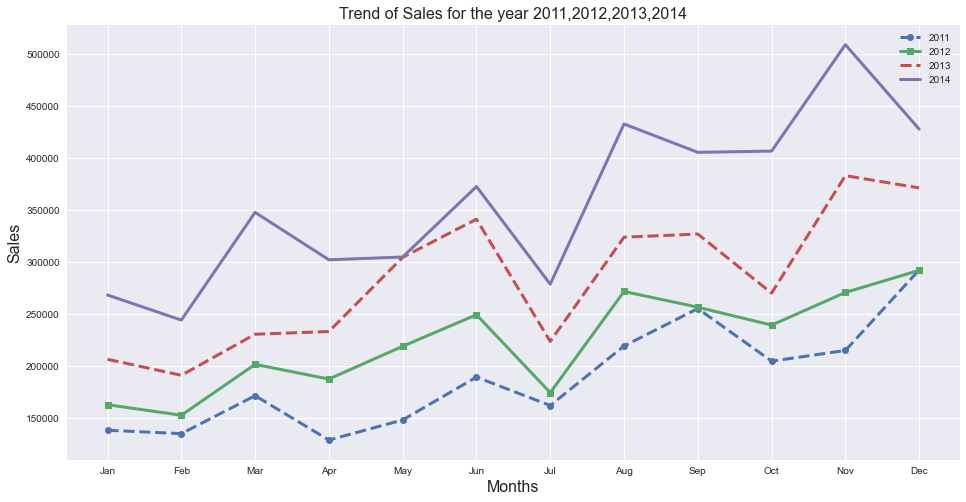

In [130]:

plt.figure(figsize=[16,8])
plt.title("Trend of Sales for the year 2011,2012,2013,2014", fontsize = 16)
plt.xlabel("Months",fontsize=16)
plt.ylabel("Sales",fontsize=16)
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = trend_201l["Order_Month"]
plt.xticks(x,labels=label)
plt.plot(x,trend_201l["Sales"],label ="2011",lw=3,ls='--', marker='o')
plt.plot(x,trend_2012["Sales"],label="2012",lw=3,ls='-', marker='s')
plt.plot(x,trend_2013["Sales"],label="2013",lw=3,ls='--', marker='1')
plt.plot(x,trend_2014["Sales"],label="2014",lw=3,ls='-', marker='+')
plt.legend()
plt.show()

### The general trend of sales from 2011 - 2014.

In [134]:
General_2011_2014 = pd.DataFrame(data.groupby("Order_Year")["Sales"].sum()).reset_index()
#convert colum order year to string
General_2011_2014['Order_Year'] = General_2011_2014['Order_Year'].apply(str)
type(General_2011_2014['Order_Year'][1])

str

<AxesSubplot:title={'center':'Trend of Sales from 2011 to 2014'}, xlabel='Years', ylabel='Sales'>

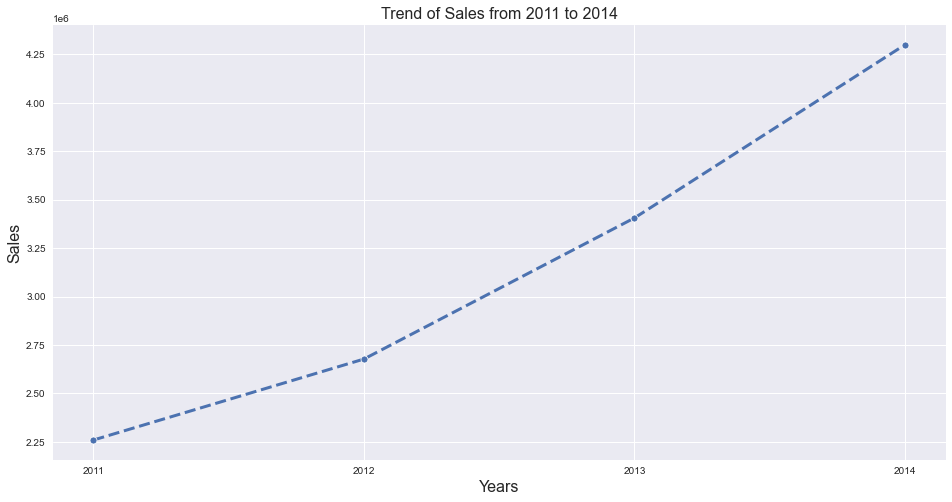

In [135]:

plt.figure(figsize=[16,8])
plt.title("Trend of Sales from 2011 to 2014", fontsize = 16)
plt.xlabel("Years",fontsize=16)
plt.ylabel("Sales",fontsize=16)
sns.lineplot(x="Order_Year", y="Sales", data=General_2011_2014,lw=3, ls='--', marker='o')
